In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
ti_train=pd.read_csv("/home/ankit/git_workspace/data/train.csv")

In [3]:
ti_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ti_test= pd.read_csv('/home/ankit/git_workspace/data/test.csv')

## this will help us about which data types are in our data



In [5]:
#to get to know how many rows and columns are in our data
ti_train.shape

(891, 12)

###    then lets check missing values are there or not

In [6]:
ti_test.shape

(418, 11)

In [7]:
print (ti_train.info())
print('*' *40)
print(ti_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [8]:
ti_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:

ti_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
ti_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCormack, Mr. Thomas Joseph",male,CA. 2343,G6,S
freq,1,577,7,4,644


####  Analyze by pivoting features¶


In [11]:
pcls= ti_train[['Pclass', 'Survived']].groupby(
['Pclass'],as_index= False).mean().sort_values(by= 'Survived',ascending= False)

In [12]:
pcls


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
pcls= ti_train[['Pclass', 'Survived']].groupby(
['Pclass'],as_index= False).mean().sort_values(by= 'Survived',ascending= False)

In [14]:
sibsp= ti_train[['SibSp', 'Survived']].groupby(
['SibSp'],as_index= False).mean().sort_values(by= 'Survived',ascending= False)

In [15]:
sibsp

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
pch= ti_train[['Parch', 'Survived']].groupby(
['Parch'],as_index= False).mean().sort_values(by= 'Survived',ascending= False)

In [17]:
pch

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
pd.merge( sibsp,pch, how='outer', on=['Survived'])

,SibSp,Survived,Parch
0,1.0,0.535885,NaN
1,2.0,0.464286,NaN
2,0.0,0.345395,NaN
3,3.0,0.250000,NaN
4,4.0,0.166667,NaN
5,5.0,0.000000,4.0
6,5.0,0.000000,6.0
7,8.0,0.000000,4.0
8,8.0,0.000000,6.0
9,NaN,0.600000,3.0


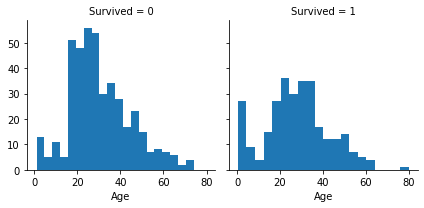

In [19]:
sur=sns.FacetGrid(ti_train, col= 'Survived')
sur.map(plt.hist, 'Age', bins =20)

###  check NAN values

In [38]:
ti_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
ti_train.Age= ti_train.Age.fillna(ti_train.Age.mean())

In [22]:
ti_train.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [23]:
ti_test.Age=ti_test.Age.fillna(ti_test.Age.mean())
ti_test.Age

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [24]:
ti_train.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
ti_train["Age"].isna().sum()

0

In [26]:
ti_test['Age'].isna().sum()

0

### check all the na values are still in the age or not

In [27]:
ti_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
ti_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Lets drop the cabin and embarked columns

In [29]:
#ti_train.drop(['Cabin', 'Embarked','PassengerId'],axis= 1).head(5)

In [30]:
#grd= sns.FacetGrid(ti_train, col= 'Survived',row= 'Pclass',
                  #size=2.2,aspect = 1.6)

#grd.map(plt.hist, 'Age', alpha=1,bins=20)


In [31]:
print(ti_train.isna().sum())
print('---------------------')
print(ti_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


##  So, One hot encoding chaning strings to int values or in binary formates for sexx column - 0 - male & 1 - female



In [32]:
#ti_train.drop(['Cabin','Embarked'],axis=1).head()

In [33]:
#ti_test.drop(['Ticket','Cabin', 'PassengerId','Name'],axis =1).head()

#### data= [ti_train, ti_test]
for dataset in data:
    dataset['Fare']= dataset['Fare'].fillna(0)
    dataset['Fare']= dataset['Fare'].astype

In [104]:
ti_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [105]:
ti_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [106]:
ebark={'S':0, 'C':1,'Q':2}


In [107]:
ti_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [108]:
ti_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [109]:
# Inserting Age in variable correlation.
ti_train['Age'] = ti_train['Age']
# Move Age at index 0.
dftrain = ti_train.set_index('Age').reset_index()
dftrain.head(2)

,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,22.0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,Mr
1,38.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Mrs


In [49]:
# Inserting Age in variable correlation.
ti_test['Age'] = ti_test['Age']
# Move Age at index 0.
dftest = ti_test.set_index('Age').reset_index()
dftest.head(2)

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,34.5,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q
1,47.0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S


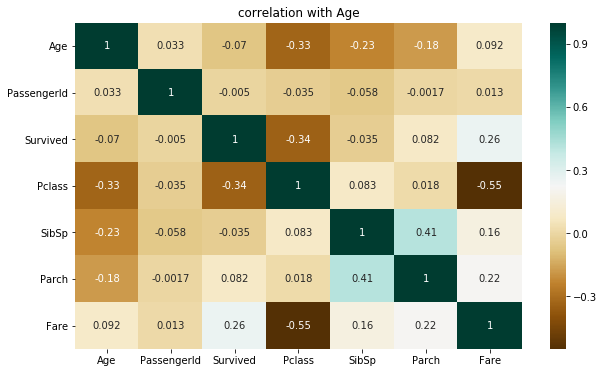

In [110]:
plt.figure(figsize=(10,6))
sns.heatmap(dftrain.corr(), cmap ='BrBG',annot = True)
plt.title('correlation with Age')
plt.show()

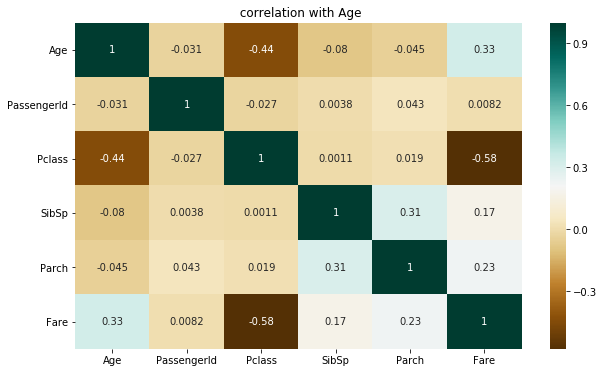

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(dftest.corr(), cmap ='BrBG',annot = True)
plt.title(' correlation with Age')
plt.show()

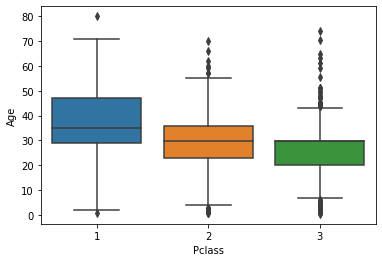

In [55]:
sns.boxplot(y='Age', x= 'Pclass', data = ti_train)

In [114]:
ti_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [115]:
ti_train['Title']=ti_train['Name'].str.extract('([A-Za-z]+)\.',expand=False) #letters followed by a dot
ti_train['Title'].head()


0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [66]:
ti_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Ms            1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Don           1
Capt          1
Name: Title, dtype: int64

In [116]:
ti_test['Title']=ti_test['Name'].str.extract('([A-Za-z]+)\.',expand=False) #letters followed by a dot
ti_test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [123]:
#train = ti_train.drop(['Survived','PassengerId','Name','Ticket','Embarked','Cabin'], axis=1)


In [125]:
ti_train.info()
print ('^*'*20)
ti_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*^*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-nul

###  CONVERTING INTERGERS AND SEX TYPE 

In [94]:
train['Age']= train['Age'].astype(int)
test['Age']= test['Age'].astype(int)
train['Sex']= train['Sex'].map({'male':0, 'female':1})
test['Sex']= test['Sex'].map({'male':0, 'female':1})